## General Statistics

Here we look at some of the general statistics around greyhound racing as a whole.

----

### 0. Read cleansed data

In [1]:
import os
import decouple
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.ticker as plticker

from scipy.stats import zscore

config = decouple.AutoConfig(' ')
os.chdir(config('ROOT_DIRECTORY'))
sys.path.insert(0, '')

pd.set_option('display.max_columns', None)

# Read in data
df_raw = pd.read_csv('./data/clean/dog_results.csv')
df_raw['RaceDate'] = pd.to_datetime(df_raw['RaceDate'], format='%Y-%m-%d')

display(df_raw.head())

,FasttrackDogId,Place,DogName,Box,Rug,Weight,StartPrice,Margin1,Margin2,PIR,Checks,SplitMargin,RunTime,Prizemoney,FasttrackRaceId,TrainerId,TrainerName,Distance,RaceGrade,Track,RaceNum,TrackDist,RaceDate
0,157500927,1,RAINE ALLEN,1,1,27.4,2.4,2.30,NaN,Q/111,0,6.68,28.66,0.0,335811282,7683,C GRENFELL,500.0,Restricted Win,Bendigo,1.0,Bendigo500,2018-07-01
1,1820620018,2,SURF A LOT,2,2,32.8,6.3,2.30,2.30,M/332,0,7.01,28.82,0.0,335811282,137227,C TYLEY,500.0,Restricted Win,Bendigo,1.0,Bendigo500,2018-07-01
2,1950680026,3,PINGIN' BEE,6,6,25.5,9.3,3.84,1.54,S/443,0,7.24,28.93,0.0,335811282,132763,P DAPIRAN,500.0,Restricted Win,Bendigo,1.0,Bendigo500,2018-07-01
3,1524380048,4,LUCAS THE GREAT,7,7,32.2,9.1,5.27,1.43,M/655,5,7.31,29.03,0.0,335811282,116605,E HAMILTON,500.0,Restricted Win,Bendigo,1.0,Bendigo500,2018-07-01
4,124225458,5,QUAVO,4,4,28.9,3.4,5.56,0.29,M/766,8,7.38,29.05,0.0,335811282,132763,P DAPIRAN,500.0,Restricted Win,Bendigo,1.0,Bendigo500,2018-07-01


### 1. Number of Races that a Greyhound or Trainer participates

Here we want to look at the number of races a greyhound or trainer typically participates in. This will assist with gauging how much information we should typically have on hand about a greyhound or trainer.

#### 1.1. Greyhounds

From the data below, we can expect 50% of greyhounds to particpate in no more than 20 races, with 25% of greyhounds participating in no more than 8 races. Hence, if we want to create a predictive model for a large proportion of races, we would be required to predict a greyhounds performance with less than 8 races of experience.

count    28251.000000
mean        27.013805
std         24.122923
min          1.000000
25%          8.000000
50%         20.000000
75%         40.000000
max        214.000000
Name: NumberOfRaces, dtype: float64

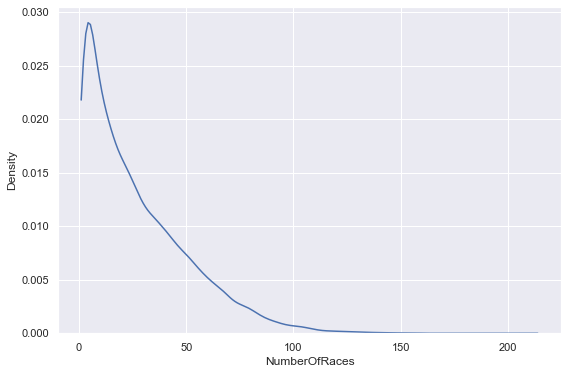

In [2]:
# Copy dataframe
df = df_raw.copy()

# Groupby each greyhound, and count the number of distinct races it took part in
df = df.groupby('FasttrackDogId', as_index=False)['FasttrackRaceId'].nunique()
df = df.rename(columns={'FasttrackRaceId': 'NumberOfRaces'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='NumberOfRaces', cut=0)

display(df.NumberOfRaces.describe())

#### 1.2. Trainers

From the data below, we can expect 50% of trainers to participate in no more than 108 races, with 25% of trainers participating in no more than 30 races. Hence, it must be typical for trainers to have owned more than one greyhound (compared to the above data), and hence we may be able to predict a greyhound's performance based on another greyhound's performance that was trained by the same trainer. Is there any other way we can use trainer data?

count    3061.000000
mean      227.836001
std       363.117343
min         1.000000
25%        30.000000
50%       108.000000
75%       273.000000
max      4339.000000
Name: NumberOfRaces, dtype: float64

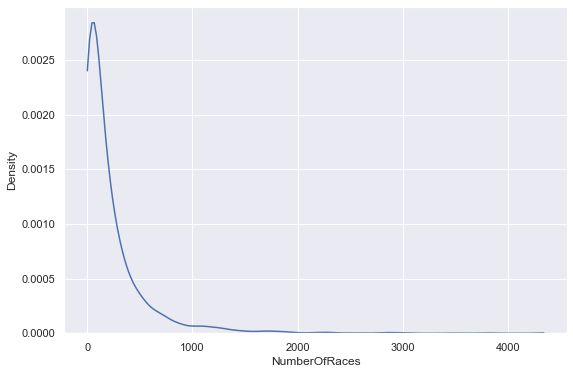

In [3]:
# Copy dataframe
df = df_raw.copy()

# Groupby trainer, and count the number of races a trainer participates in
df = df.groupby('TrainerId', as_index=False)['FasttrackRaceId'].nunique()
df = df.rename(columns={'FasttrackRaceId': 'NumberOfRaces'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='NumberOfRaces', cut=0)

display(df.NumberOfRaces.describe())

### 2. Lifetime of Greyhounds and Trainers

Here we want to look at the typical lifetime of greyhounds and their trainers (time between their first and last race). This information may be of use in determining whether we want to take the perfomance of a trainer or greyhound over the last N races or N units of time (or both?).

#### 2.1. Greyhounds

From the below, 50% of greyhounds have a lifetime of no more than 265 days (approximately 9 months), with greyhounds racing for approximately 316 days on average (approximately 11 months). With some greyhounds racing for up to nearly 4 years (at least, that's where our data stops).

count    28251.000000
mean       316.468798
std        259.314496
min          0.000000
25%         94.000000
50%        265.000000
75%        488.000000
max       1245.000000
Name: Lifetime, dtype: float64

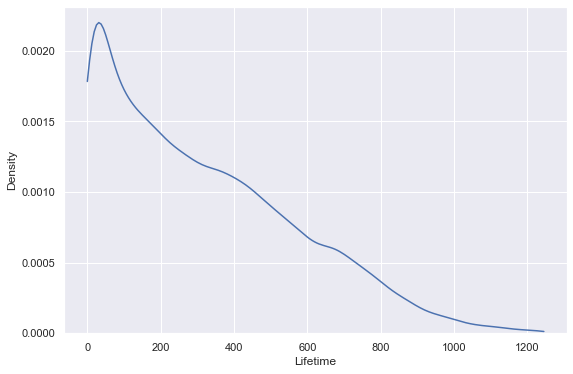

In [4]:
# Copy dataframe
df = df_raw.copy()

# Groupby greyhound, and take the difference in days between first and last race
df = df.groupby('FasttrackDogId', as_index=False)['RaceDate'].apply(lambda x: (max(x) - min(x)).days)
df = df.rename(columns={'RaceDate': 'Lifetime'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='Lifetime', cut=0)

display(df.Lifetime.describe())

#### 2.2. Trainers

Interestingly, trainers are competing for a relatively long period of time (compared to the lifetime of a racing greyhound). The average trainer competes for 826 days (nearly 3 years), with 50% of trainers competing for at least 1040 days. These statistics are probably a lower estimate, since our data is limited to approximately 4 years. 

count    3061.000000
mean      826.571709
std       453.719669
min         0.000000
25%       399.000000
50%      1040.000000
75%      1239.000000
max      1248.000000
Name: Lifetime, dtype: float64

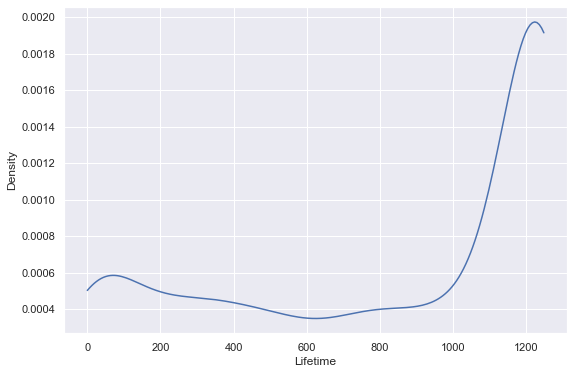

In [5]:
# Copy dataframe
df = df_raw.copy()

# Groupby greyhound, and take the difference in days between first and last race
df = df.groupby('TrainerId', as_index=False)['RaceDate'].apply(lambda x: (max(x) - min(x)).days)
df = df.rename(columns={'RaceDate': 'Lifetime'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='Lifetime', cut=0)

display(df.Lifetime.describe())

### 3. Time between races for Greyhounds

From below, it appears to be pretty typical for greyhounds to have a week rest between races (50% of break lengths are between 6 and 10 days, inclusive). Although, it does appear that some greyhounds are rushed into their next race somewhat frequently (less than 6 days).

count    734916.000000
mean         12.165418
std          21.060389
min           1.000000
25%           6.000000
50%           7.000000
75%          10.000000
max        1096.000000
Name: DaysBetweenRaces, dtype: float64

<AxesSubplot:xlabel='DaysBetweenRaces', ylabel='Count'>

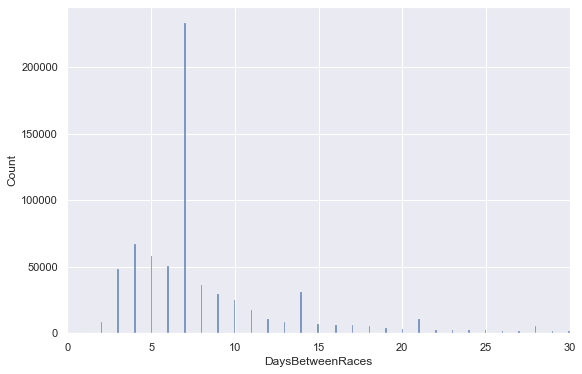

In [6]:
# Copy dataframe
df = df_raw.copy()

# Groupby greyhound and take the difference in days between races
df = df.sort_values(by=['FasttrackDogId', 'RaceDate'], ascending=True)
df = df.groupby('FasttrackDogId', as_index=False)['RaceDate'].diff()
df['RaceDate'] = df['RaceDate'].dt.days
df = df.rename(columns={'RaceDate': 'DaysBetweenRaces'})

# Drop NaN's (first race)
df = df.dropna()

display(df.DaysBetweenRaces.describe())

# Plot (between 0 and 30 days, ignore large outliers)
df = df[df['DaysBetweenRaces'] <= 30]
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)
plt.xlim(0,30)

sns.histplot(data=df, x='DaysBetweenRaces')

### 4. Number of Greyhounds per Trainer over Lifetime of Trainer

From the data below, we see that it's very common for trainers to compete with more than one greyhound over their lifetime. With 50% of trainers having competed with at least 8 distinct greyhounds, with 75% of trainers having competed with at least 3 distinct greyhounds over their lifetime.

count    3061.000000
mean       14.525972
std        22.466411
min         1.000000
25%         3.000000
50%         8.000000
75%        17.000000
max       474.000000
Name: NumberOfGreyhounds, dtype: float64

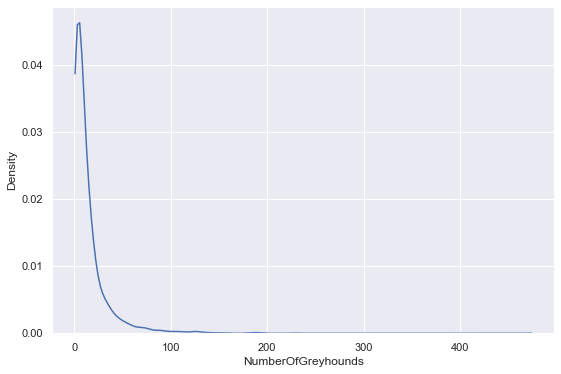

In [7]:
# Copy dataframe
df = df_raw.copy()

# Groupby trainer id and count the number of distinct greyhounds
df = df.groupby('TrainerId', as_index=False)['FasttrackDogId'].nunique()
df = df.rename(columns={'FasttrackDogId': 'NumberOfGreyhounds'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='NumberOfGreyhounds', cut=0)

display(df.NumberOfGreyhounds.describe())

### 5. Number of Distinct Tracks for Greyhounds

From below, we see that it's fairly common for greyhounds to only race at a small number of tracks, with 50% of greyhounds racing at no more than 3 distinct tracks. Although, they may also race at different distances at these tracks.

count    28251.000000
mean         3.694772
std          2.579147
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         17.000000
Name: NumberOfTracks, dtype: float64

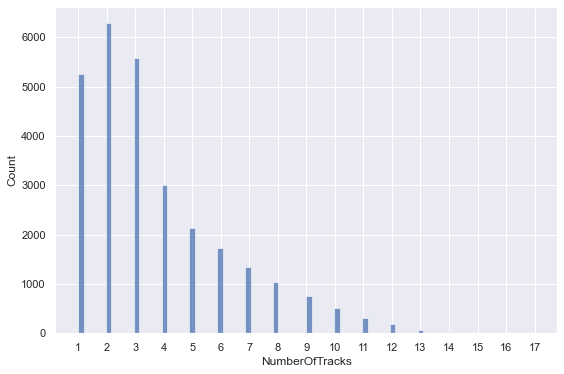

In [8]:
# Copy dataframe
df = df_raw.copy()

# Count the number of distinct venues for each greyhound
df = df.groupby('FasttrackDogId', as_index=False)['Track'].nunique()
df = df.rename(columns={'Track': 'NumberOfTracks'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax = sns.histplot(data=df, x='NumberOfTracks')

display(df.NumberOfTracks.describe())

### 6. Range of Distances for Greyhounds

From below, it appears that greyhounds compete at relatively similar distances each race (50% of greyhounds stick to a distances in a 130m range), with 75% of greyhounds limiting this range to no more than 200m. There appears to be a number of couple of distinct peaks in the plot below, I'm speculating that this is due to 'standardized' distances across tracks (i.e. the distances raced at distinct tracks aren't arbitrarily chosen between 0 and X meters).

count    28251.000000
mean       132.569325
std         89.710999
min          0.000000
25%         64.000000
50%        130.000000
75%        200.000000
max        453.000000
Name: DistanceDiff, dtype: float64

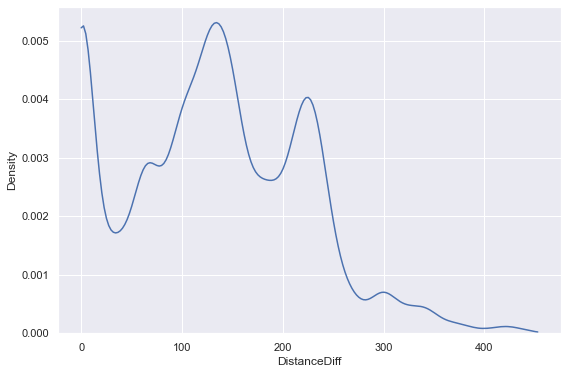

In [9]:
# Copy dataframe
df = df_raw.copy()

# Group by greyhound and take the difference between max and min distances raced
df = df.groupby('FasttrackDogId', as_index=False)['Distance'].apply(lambda x: max(x) - min(x))
df = df.rename(columns={'Distance': 'DistanceDiff'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

sns.kdeplot(data=df, x='DistanceDiff', cut=0)

display(df.DistanceDiff.describe())

### 7. Number of Greyhounds per Race

The majority of the time, we should expect 8 greyhounds in any given race. With more than 75% of races containing at least 6 greyhounds competing. We should note (although obvious) the lower the number of greyhounds competing in a given race, the more likely any individual greyhound will win.

count    106942.000000
mean          7.136270
std           1.104752
min           1.000000
25%           6.000000
50%           8.000000
75%           8.000000
max           8.000000
Name: NumberOfGreyhounds, dtype: float64

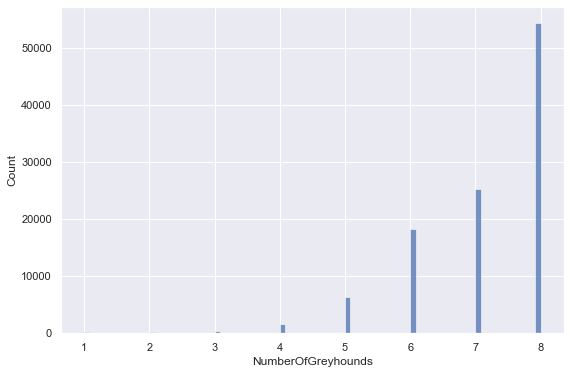

In [10]:
# Copy dataframe
df = df_raw.copy()

# Groupby race and count the number of greyhounds
df = df.groupby('FasttrackRaceId', as_index=False)['FasttrackDogId'].nunique()
df = df.rename(columns={'FasttrackDogId': 'NumberOfGreyhounds'})

# Plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(9, 6))
plt.rc('xtick',labelsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rc('ytick',labelsize=15)

loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax = sns.histplot(data=df, x='NumberOfGreyhounds')

display(df.NumberOfGreyhounds.describe())